# test

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [45]:
# 데이터 정보 출력 함수
def data_info(df):
    print('\n\ndata :\n')
    display(df)
    print('\n\ninfo :\n')
    print(df.info())
    print('\n\ndescribe :\n')
    print(display(df.describe()))
    print('\n\nisnull :\n')
    print(df.isnull().sum())

In [46]:
# 데이터 로드
train_data_2019=pd.read_csv('../data/2019-TR031900020001.csv')
train_data_2020=pd.read_csv('../data/2020-TR031900020001.csv')
train_data_2021=pd.read_csv('../data/2021-TR031900020001.csv')

train_data=pd.concat([train_data_2019,train_data_2020,train_data_2021],ignore_index=True)

train_data


C:\Users\sangi\AppData\Local\Temp\ipykernel_22680\3917371332.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data_2019=pd.read_csv('../data/2019-TR031900020001.csv')
C:\Users\sangi\AppData\Local\Temp\ipykernel_22680\3917371332.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data_2020=pd.read_csv('../data/2020-TR031900020001.csv')
C:\Users\sangi\AppData\Local\Temp\ipykernel_22680\3917371332.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data_2021=pd.read_csv('../data/2021-TR031900020001.csv')


,RUN_DT,TRN_NO,UP_DN_DV_CD,TRN_CLSF_CD,RUN_DV_CD,ORG_STN_CD,TRN_ORG_TM,TMN_STN_CD,TRN_TMN_TM,DALC_FLG,TRN_ATT_CD,DVD_ANX_DV_CD,RUN_ELPS_DNO,BIZ_FLG,BF_CPS_OPN_FLG,AFT_CPS_OPN_FLG,CPS_RDIR_FLG,PRC_CL_CD,MRNT_CD
0,20190101,1001,D,8,1,3900023,61600,3900114,105500,N,1,NaN,0,Y,Y,N,Y,81.0,01
1,20190101,1002,U,8,1,3900114,62400,3900023,110500,N,1,NaN,0,Y,Y,N,N,81.0,01
2,20190101,1003,D,8,1,3900023,91600,3900114,135600,N,1,NaN,0,Y,Y,N,N,81.0,01
3,20190101,1004,U,8,1,3900114,91500,3900023,135400,N,1,NaN,0,Y,Y,N,N,81.0,01
4,20190101,1005,D,8,1,3900023,110500,3900114,154700,N,1,NaN,0,Y,Y,N,Y,81.0,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664405,20210630,847,D,10,1,3900023,183100,3900580,210600,N,1,NaN,0,Y,Y,N,N,101.0,N1
664406,20210630,848,U,10,1,3900580,213000,3900023,1100,N,1,NaN,1,Y,Y,N,N,101.0,N1
664407,20210630,9,D,0,1,3900023,70000,3900114,93800,N,1,NaN,0,Y,Y,N,N,1.0,01
664408,20210630,9237,D,7,1,3900023,92500,3901040,114800,N,1,1.0,0,Y,Y,N,N,71.0,8B


In [47]:
# 컬럼명 직관적으로 변경
column_mapping = {
    "RUN_DT": "date",                # 운행일자
    "TRN_NO": "train_no",            # 열차번호
    "UP_DN_DV_CD": "direction",      # 상행/하행 구분 코드 (U: 상행, D: 하행)
    "TRN_CLSF_CD": "train_type",     # 열차종별 코드 (0: KTX, 1: 새마을호 등)
    "RUN_DV_CD": "run_type",         # 운행구분 코드 (1: 정기, 2: 부정기, 3: 임시)
    "ORG_STN_CD": "start_station",   # 출발역 코드
    "TRN_ORG_TM": "start_time",      # 출발 시각 (HHMMSS)
    "TMN_STN_CD": "end_station",     # 도착역 코드
    "TRN_TMN_TM": "end_time",        # 도착 시각 (HHMMSS)
    "DALC_FLG": "return_flag",       # 회송 여부 (N: 일반 운행, Y: 회송)
    "TRN_ATT_CD": "train_attr",      # 열차 속성 코드 (1: 일반, 2: 단체 등)
    "DVD_ANX_DV_CD": "merge_split",  # 분할/합병 구분 코드 (1: 분할, 2: 합병, 3: 순환)
    "RUN_ELPS_DNO": "elapsed_days",  # 운행 경과 일수
    "BIZ_FLG": "biz_flag",           # 영업 여부 (Y: 영업, N: 비영업)
    "BF_CPS_OPN_FLG": "before_open", # 이전 편성 공개 여부 (Y/N)
    "AFT_CPS_OPN_FLG": "after_open", # 이후 편성 공개 여부 (Y/N)
    "CPS_RDIR_FLG": "forward_flag",  # 편성 순방향 여부 (Y/N)       기관사의 위치
    "PRC_CL_CD": "price_class",      # 운임 등급 코드 (KTX, ITX 등급별 코드)
    "MRNT_CD": "main_route"          # 주 운행 노선 코드 (01: 경부선, 8B: 중앙선 등)
}
train_data=train_data.rename(columns=column_mapping)

# 운행 날짜 datetime으로 변경
train_data['date']=pd.to_datetime(train_data['date'].astype(str),format='%Y%m%d')

# 열차시발시각, 열차종착시각 datetime으로 변경
train_data['start_time'] = pd.to_datetime(train_data['start_time'].astype(str).str.zfill(6), format='%H%M%S')
train_data['end_time'] = pd.to_datetime(train_data['end_time'].astype(str).str.zfill(6), format='%H%M%S')

train_data

,date,train_no,direction,train_type,run_type,start_station,start_time,end_station,end_time,return_flag,train_attr,merge_split,elapsed_days,biz_flag,before_open,after_open,forward_flag,price_class,main_route
0,2019-01-01,1001,D,8,1,3900023,1900-01-01 06:16:00,3900114,1900-01-01 10:55:00,N,1,NaN,0,Y,Y,N,Y,81.0,01
1,2019-01-01,1002,U,8,1,3900114,1900-01-01 06:24:00,3900023,1900-01-01 11:05:00,N,1,NaN,0,Y,Y,N,N,81.0,01
2,2019-01-01,1003,D,8,1,3900023,1900-01-01 09:16:00,3900114,1900-01-01 13:56:00,N,1,NaN,0,Y,Y,N,N,81.0,01
3,2019-01-01,1004,U,8,1,3900114,1900-01-01 09:15:00,3900023,1900-01-01 13:54:00,N,1,NaN,0,Y,Y,N,N,81.0,01
4,2019-01-01,1005,D,8,1,3900023,1900-01-01 11:05:00,3900114,1900-01-01 15:47:00,N,1,NaN,0,Y,Y,N,Y,81.0,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664405,2021-06-30,847,D,10,1,3900023,1900-01-01 18:31:00,3900580,1900-01-01 21:06:00,N,1,NaN,0,Y,Y,N,N,101.0,N1
664406,2021-06-30,848,U,10,1,3900580,1900-01-01 21:30:00,3900023,1900-01-01 00:11:00,N,1,NaN,1,Y,Y,N,N,101.0,N1
664407,2021-06-30,9,D,0,1,3900023,1900-01-01 07:00:00,3900114,1900-01-01 09:38:00,N,1,NaN,0,Y,Y,N,N,1.0,01
664408,2021-06-30,9237,D,7,1,3900023,1900-01-01 09:25:00,3901040,1900-01-01 11:48:00,N,1,1.0,0,Y,Y,N,N,71.0,8B


In [48]:
# 데이터 구조 탐색
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664410 entries, 0 to 664409
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           664410 non-null  datetime64[ns]
 1   train_no       664410 non-null  object        
 2   direction      664410 non-null  object        
 3   train_type     664410 non-null  int64         
 4   run_type       664410 non-null  int64         
 5   start_station  664410 non-null  int64         
 6   start_time     664410 non-null  datetime64[ns]
 7   end_station    664410 non-null  int64         
 8   end_time       664410 non-null  datetime64[ns]
 9   return_flag    664410 non-null  object        
 10  train_attr     664410 non-null  int64         
 11  merge_split    50492 non-null   float64       
 12  elapsed_days   664410 non-null  int64         
 13  biz_flag       664410 non-null  object        
 14  before_open    664408 non-null  object        
 15  

,date,train_type,run_type,start_station,start_time,end_station,end_time,train_attr,merge_split,elapsed_days,price_class
count,664410,664410.000000,664410.000000,6.644100e+05,664410,6.644100e+05,664410,664410.000000,50492.000000,664410.000000,664408.000000
mean,2020-03-29 09:05:53.221655808,3.537728,1.077300,3.900267e+06,1900-01-01 13:29:57.101608448,3.900267e+06,1900-01-01 14:48:37.564603904,1.136645,1.543175,0.064709,36.377389
min,2019-01-01 00:00:00,0.000000,1.000000,3.900023e+06,1900-01-01 00:00:00,3.900023e+06,1900-01-01 00:00:00,1.000000,1.000000,0.000000,1.000000
25%,2019-08-16 00:00:00,1.000000,1.000000,3.900025e+06,1900-01-01 09:01:00,3.900025e+06,1900-01-01 10:56:00,1.000000,1.000000,0.000000,11.000000
50%,2020-03-28 00:00:00,2.000000,1.000000,3.900153e+06,1900-01-01 13:40:00,3.900153e+06,1900-01-01 15:21:00,1.000000,2.000000,0.000000,21.000000
75%,2020-11-11 00:00:00,7.000000,1.000000,3.900437e+06,1900-01-01 17:45:00,3.900437e+06,1900-01-01 19:47:00,1.000000,2.000000,0.000000,71.000000
max,2021-06-30 00:00:00,10.000000,9.000000,3.901102e+06,1900-01-01 23:56:00,3.901102e+06,1900-01-01 23:58:00,6.000000,2.000000,2.000000,101.000000
std,NaN,3.343333,0.386146,2.784734e+02,NaN,2.784936e+02,NaN,0.790081,0.498137,0.246133,33.433323


In [49]:
# 결측치 탐색
train_data.isnull().sum()

date                  0
train_no              0
direction             0
train_type            0
run_type              0
start_station         0
start_time            0
end_station           0
end_time              0
return_flag           0
train_attr            0
merge_split      613918
elapsed_days          0
biz_flag              0
before_open           2
after_open            2
forward_flag      31812
price_class           2
main_route            0
dtype: int64

In [50]:
# 1차 결측치 처리

# EDA 생성에 필요없는 데이터일 뿐더러 결측치가 92.4% 이기 때문에 제거 처리
# 분할/합병 구분 코드 (1: 분할, 2: 합병, 3: 순환)
train_data=train_data.drop('merge_split',axis=1)

# 결측치를 가진 데이터 수가 전체 데이터 수에 비에 굉장히 적기 때문에 드랍
# 이전 편성 공개 여부 (Y/N), 이후 편성 공개 여부 (Y/N), 운임 등급 코드 (KTX, ITX 등급별 코드)
train_data=train_data.drop(['before_open','after_open','price_class'],axis=1)

# 결측치 최빈값으로 대체
# 편성 순방향 여부 (Y/N)       기관사의 위치
train_data['forward_flag'] = train_data['forward_flag'].fillna(train_data['forward_flag'].mode()[0])


In [51]:
data_info(train_data)



data :



,date,train_no,direction,train_type,run_type,start_station,start_time,end_station,end_time,return_flag,train_attr,elapsed_days,biz_flag,forward_flag,main_route
0,2019-01-01,1001,D,8,1,3900023,1900-01-01 06:16:00,3900114,1900-01-01 10:55:00,N,1,0,Y,Y,01
1,2019-01-01,1002,U,8,1,3900114,1900-01-01 06:24:00,3900023,1900-01-01 11:05:00,N,1,0,Y,N,01
2,2019-01-01,1003,D,8,1,3900023,1900-01-01 09:16:00,3900114,1900-01-01 13:56:00,N,1,0,Y,N,01
3,2019-01-01,1004,U,8,1,3900114,1900-01-01 09:15:00,3900023,1900-01-01 13:54:00,N,1,0,Y,N,01
4,2019-01-01,1005,D,8,1,3900023,1900-01-01 11:05:00,3900114,1900-01-01 15:47:00,N,1,0,Y,Y,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664405,2021-06-30,847,D,10,1,3900023,1900-01-01 18:31:00,3900580,1900-01-01 21:06:00,N,1,0,Y,N,N1
664406,2021-06-30,848,U,10,1,3900580,1900-01-01 21:30:00,3900023,1900-01-01 00:11:00,N,1,1,Y,N,N1
664407,2021-06-30,9,D,0,1,3900023,1900-01-01 07:00:00,3900114,1900-01-01 09:38:00,N,1,0,Y,N,01
664408,2021-06-30,9237,D,7,1,3900023,1900-01-01 09:25:00,3901040,1900-01-01 11:48:00,N,1,0,Y,N,8B




info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664410 entries, 0 to 664409
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           664410 non-null  datetime64[ns]
 1   train_no       664410 non-null  object        
 2   direction      664410 non-null  object        
 3   train_type     664410 non-null  int64         
 4   run_type       664410 non-null  int64         
 5   start_station  664410 non-null  int64         
 6   start_time     664410 non-null  datetime64[ns]
 7   end_station    664410 non-null  int64         
 8   end_time       664410 non-null  datetime64[ns]
 9   return_flag    664410 non-null  object        
 10  train_attr     664410 non-null  int64         
 11  elapsed_days   664410 non-null  int64         
 12  biz_flag       664410 non-null  object        
 13  forward_flag   664410 non-null  object        
 14  main_route     664410 non-null  object    

,date,train_type,run_type,start_station,start_time,end_station,end_time,train_attr,elapsed_days
count,664410,664410.000000,664410.000000,6.644100e+05,664410,6.644100e+05,664410,664410.000000,664410.000000
mean,2020-03-29 09:05:53.221655808,3.537728,1.077300,3.900267e+06,1900-01-01 13:29:57.101608448,3.900267e+06,1900-01-01 14:48:37.564603904,1.136645,0.064709
min,2019-01-01 00:00:00,0.000000,1.000000,3.900023e+06,1900-01-01 00:00:00,3.900023e+06,1900-01-01 00:00:00,1.000000,0.000000
25%,2019-08-16 00:00:00,1.000000,1.000000,3.900025e+06,1900-01-01 09:01:00,3.900025e+06,1900-01-01 10:56:00,1.000000,0.000000
50%,2020-03-28 00:00:00,2.000000,1.000000,3.900153e+06,1900-01-01 13:40:00,3.900153e+06,1900-01-01 15:21:00,1.000000,0.000000
75%,2020-11-11 00:00:00,7.000000,1.000000,3.900437e+06,1900-01-01 17:45:00,3.900437e+06,1900-01-01 19:47:00,1.000000,0.000000
max,2021-06-30 00:00:00,10.000000,9.000000,3.901102e+06,1900-01-01 23:56:00,3.901102e+06,1900-01-01 23:58:00,6.000000,2.000000
std,NaN,3.343333,0.386146,2.784734e+02,NaN,2.784936e+02,NaN,0.790081,0.246133


None


isnull :

date             0
train_no         0
direction        0
train_type       0
run_type         0
start_station    0
start_time       0
end_station      0
end_time         0
return_flag      0
train_attr       0
elapsed_days     0
biz_flag         0
forward_flag     0
main_route       0
dtype: int64


# EDA주요 EDA 및 분석 가능 항목

In [52]:
# 2차 결측치 처리

# EDA 분석에 사용되지 않는 컬럼 AND 이분되 있는 데이터는 한쪽의 데이터 수가 압도적으로 적음
# 영업 여부 (Y: 영업, N: 비영업)
# (train_data['biz_flag']=='N').sum() -> 15
train_data=train_data.drop('biz_flag',axis=1)

# EDA 분석에 사용되지 않는 컬럼
# 회송 여부 (N: 일반 운행, Y: 회송), 열차 속성 코드 (1: 일반, 2: 단체 등), 편성 순방향 여부 (Y/N) 
train_data=train_data.drop(['return_flag','train_attr','forward_flag'],axis=1)


In [53]:
data_info(train_data)



data :



,date,train_no,direction,train_type,run_type,start_station,start_time,end_station,end_time,elapsed_days,main_route
0,2019-01-01,1001,D,8,1,3900023,1900-01-01 06:16:00,3900114,1900-01-01 10:55:00,0,01
1,2019-01-01,1002,U,8,1,3900114,1900-01-01 06:24:00,3900023,1900-01-01 11:05:00,0,01
2,2019-01-01,1003,D,8,1,3900023,1900-01-01 09:16:00,3900114,1900-01-01 13:56:00,0,01
3,2019-01-01,1004,U,8,1,3900114,1900-01-01 09:15:00,3900023,1900-01-01 13:54:00,0,01
4,2019-01-01,1005,D,8,1,3900023,1900-01-01 11:05:00,3900114,1900-01-01 15:47:00,0,01
...,...,...,...,...,...,...,...,...,...,...,...
664405,2021-06-30,847,D,10,1,3900023,1900-01-01 18:31:00,3900580,1900-01-01 21:06:00,0,N1
664406,2021-06-30,848,U,10,1,3900580,1900-01-01 21:30:00,3900023,1900-01-01 00:11:00,1,N1
664407,2021-06-30,9,D,0,1,3900023,1900-01-01 07:00:00,3900114,1900-01-01 09:38:00,0,01
664408,2021-06-30,9237,D,7,1,3900023,1900-01-01 09:25:00,3901040,1900-01-01 11:48:00,0,8B




info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664410 entries, 0 to 664409
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           664410 non-null  datetime64[ns]
 1   train_no       664410 non-null  object        
 2   direction      664410 non-null  object        
 3   train_type     664410 non-null  int64         
 4   run_type       664410 non-null  int64         
 5   start_station  664410 non-null  int64         
 6   start_time     664410 non-null  datetime64[ns]
 7   end_station    664410 non-null  int64         
 8   end_time       664410 non-null  datetime64[ns]
 9   elapsed_days   664410 non-null  int64         
 10  main_route     664410 non-null  object        
dtypes: datetime64[ns](3), int64(5), object(3)
memory usage: 55.8+ MB
None


describe :



,date,train_type,run_type,start_station,start_time,end_station,end_time,elapsed_days
count,664410,664410.000000,664410.000000,6.644100e+05,664410,6.644100e+05,664410,664410.000000
mean,2020-03-29 09:05:53.221655808,3.537728,1.077300,3.900267e+06,1900-01-01 13:29:57.101608448,3.900267e+06,1900-01-01 14:48:37.564603904,0.064709
min,2019-01-01 00:00:00,0.000000,1.000000,3.900023e+06,1900-01-01 00:00:00,3.900023e+06,1900-01-01 00:00:00,0.000000
25%,2019-08-16 00:00:00,1.000000,1.000000,3.900025e+06,1900-01-01 09:01:00,3.900025e+06,1900-01-01 10:56:00,0.000000
50%,2020-03-28 00:00:00,2.000000,1.000000,3.900153e+06,1900-01-01 13:40:00,3.900153e+06,1900-01-01 15:21:00,0.000000
75%,2020-11-11 00:00:00,7.000000,1.000000,3.900437e+06,1900-01-01 17:45:00,3.900437e+06,1900-01-01 19:47:00,0.000000
max,2021-06-30 00:00:00,10.000000,9.000000,3.901102e+06,1900-01-01 23:56:00,3.901102e+06,1900-01-01 23:58:00,2.000000
std,NaN,3.343333,0.386146,2.784734e+02,NaN,2.784936e+02,NaN,0.246133


None


isnull :

date             0
train_no         0
direction        0
train_type       0
run_type         0
start_station    0
start_time       0
end_station      0
end_time         0
elapsed_days     0
main_route       0
dtype: int64


# 주요 EDA 및 분석 가능 항목

In [54]:
import matplotlib.font_manager as fm
import matplotlib

font_path='C:\\Windows\\Fonts\\gulim.ttc'
font=fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

(1) 운행 패턴 분석  
일별, 월별 운행 횟수 

운행일자 기준으로 월별, 요일별 운행 횟수 시각화     
→ 특정 요일/월에 운행이 많은지, 적은지 확인     
→ 성수기(여름/겨울 방학, 연휴)와 비수기 비교 가능   
시간대별 운행 패턴 분석 

열차시발시각 기준으로 출발 시간대별 운행량 분석     
→ 아침/저녁 피크 시간대 비교 (출퇴근 시간대 vs 낮 시간대)       
→ 히트맵(Heatmap)으로 시각화 가능   

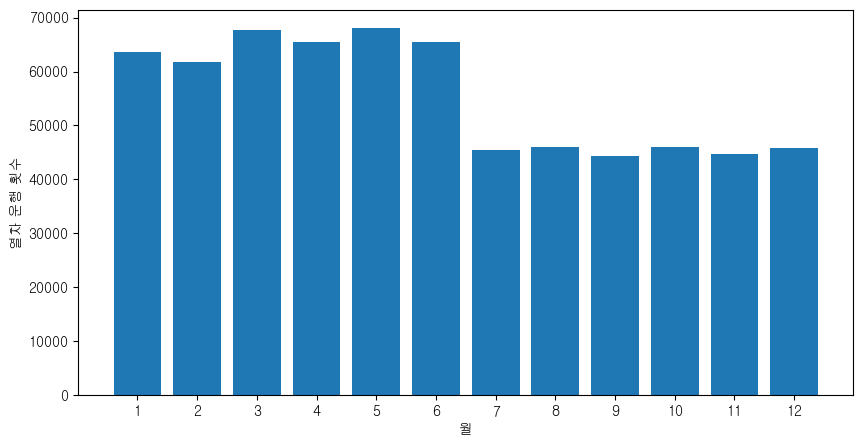

In [55]:
# 월별 운행 횟수
train_data['month'] = train_data['date'].dt.month
oper_train_month = train_data['month'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10,5))
plt.bar(oper_train_month.index, oper_train_month.values)
plt.xlabel('월')
plt.ylabel('열차 운행 횟수')
plt.xticks(range(1, 13))
plt.show()

(2) 가장 많이 출발하는 역, 도착하는 역

시발역코드, 종착역코드 기준 출발/도착 빈도수 분석   
→ 어떤 역에서 가장 많은 열차가 출발하는지?  
→ 가장 많이 도착하는 종착역은 어디인지? 
노선별 운행 특성 분석   

시발역코드, 종착역코드를 조합하여 주요 노선 시각화  
→ 어떤 구간이 가장 많이 운행되는지? 
→ 출발-도착 빈도수 기반 상위 인기 노선 분석 가능    

(3) 열차 종류 및 운행 특성 분석 
열열차종별코드 분포 분석

열차종별코드를 활용하여 KTX, 무궁화, 새마을 등 열차 종류별 운행 빈도 분석   
→ KTX와 일반 열차의 운행 횟수 차이 비교 
상행/하행 운행 비율 분석

상행하행구분코드를 활용하여 상행/하행 비율 분석 
→ 노선별 상행/하행 편차가 있는지 확인   
운임 등급 분석  

운임등급코드를 활용하여 고속열차(KTX) vs 일반열차(무궁화) 비교 (예외)   
→ 고급 열차 vs 일반 열차 운행 비율 차이 분석    

(4) 데이터 시각화 아이디어  
히스토그램

운행시간 분포, 노선별 운행 횟수 / 박스플롯 (Boxplot)    
출발 시간별 운행 횟수 비교 (출퇴근 시간대 비교 )/  바 차트  
가장 많이 운행되는 노선 시각화 / 히트맵 (Heatmap)
출발-도착 역 간 운행 빈도   
시간대별 열차 운행 밀도 
선 그래프   
일별/월별 운행 횟수 변화    